In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP file
uploaded = files.upload()

# Step 2: Extract the ZIP file
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("unzipped")
        print(f"Extracted '{filename}' to 'unzipped/'")

# Step 3: List extracted files
print("Contents of 'unzipped' directory:")
print(os.listdir("unzipped"))



Saving archive (4).zip to archive (4).zip
Extracted 'archive (4).zip' to 'unzipped/'
Contents of 'unzipped' directory:
['Pneumonia_CXRimages_sample_dataset', 'Pneumonia_CXRreports_sample_dataset']


In [ ]:
import os

for root, dirs, files in os.walk("unzipped"):
    level = root.replace("unzipped", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # Print only first 5 files in each folder
        print(f"{subindent}{f}")


unzipped/
    Pneumonia_CXRimages_sample_dataset/
        Pneunmonia_CXRimages_sample_dataset/
            images/
                normal/
                    Normal (156).png
                    IM-0621-0001.jpeg
                    Normal (303).png
                    Normal (256).png
                    IM-0533-0001-0002.jpeg
                covid-19/
                    covid_377.png
                    covid_229.png
                    covid_535.png
                    covid_13.png
                    covid_232.png
                bacterial/
                    person19_bacteria_60.jpeg
                    person51_bacteria_243.jpeg
                    person26_bacteria_122.jpeg
                    person30_bacteria_145.jpeg
                    person37_bacteria_186.jpeg
                viral/
                    person11_virus_38.jpeg
                    person21_virus_52.jpeg
                    person50_virus_102.jpeg
                    person75_virus_136.jpeg
                

In [ ]:
data_dir = '/content/unzipped/Pneumonia_CXRimages_sample_dataset/Pneunmonia_CXRimages_sample_dataset/images'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 150, 150
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Functional model
input_img = tf.keras.Input(shape=(img_height, img_width, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', name='conv1')(input_img)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=input_img, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


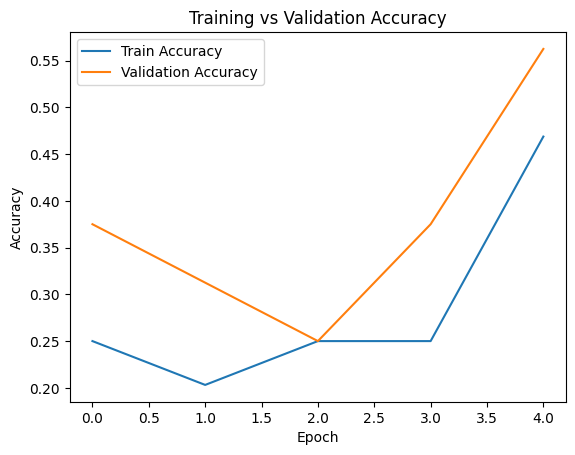

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2604 - loss: 4.5285 - val_accuracy: 0.3750 - val_loss: 6.0074
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2083 - loss: 6.1372 - val_accuracy: 0.3125 - val_loss: 2.9287
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.2917 - loss: 2.7598 - val_accuracy: 0.2500 - val_loss: 2.0108
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2708 - loss: 1.5991 - val_accuracy: 0.3750 - val_loss: 1.3378
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4583 - loss: 1.2802 - val_accuracy: 0.5625 - val_loss: 1.3178


Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.2708 - loss: 5.6428 - val_accuracy: 0.2500 - val_loss: 6.1762
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.2500 - loss: 5.2128 - val_accuracy: 0.2500 - val_loss: 2.8129
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.2500 - loss: 2.0677 - val_accuracy: 0.3125 - val_loss: 1.3346
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6667 - loss: 1.1885 - val_accuracy: 0.4375 - val_loss: 1.3822
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7604 - loss: 1.0670 - val_accuracy: 0.5000 - val_loss: 1.2331


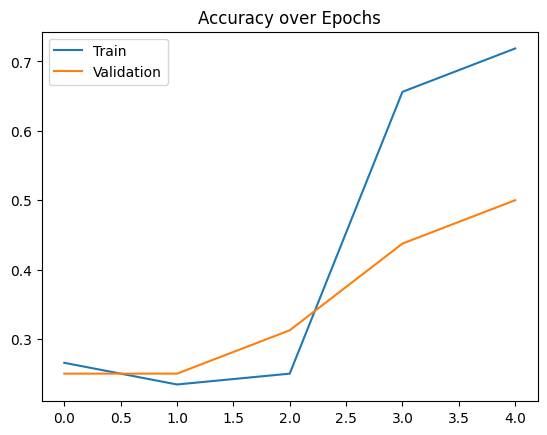

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Paths
data_dir = '/content/unzipped/Pneumonia_CXRimages_sample_dataset/Pneunmonia_CXRimages_sample_dataset/images'

# Image settings
img_height, img_width = 224, 224
batch_size = 32

# Image generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=1,  # For Grad-CAM
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_labels = list(train_gen.class_indices.keys())

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=5)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import cv2

def get_img_array(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        output = predictions[:, pred_index]

    grads = tape.gradient(output, conv_outputs)[0]
    conv_outputs = conv_outputs[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.dot(conv_outputs, weights.numpy())
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam = cv2.resize(cam, (img_width, img_height))
    return cam, pred_index.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_width, img_height))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM Overlay")
    plt.show()


Predicted class: viral


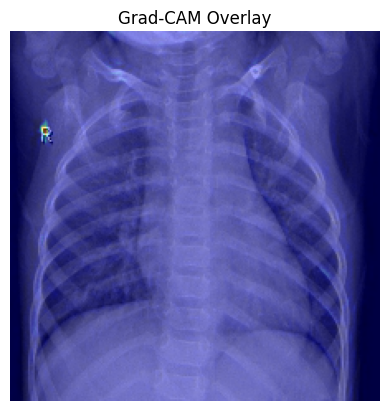

In [ ]:
# Choose one validation image
sample_path = val_gen.filepaths[10]  # You can change the index

img_array = get_img_array(sample_path)
heatmap, pred_index = make_gradcam_heatmap(img_array, model, 'conv2')

print(f"Predicted class: {class_labels[pred_index]}")
display_gradcam(sample_path, heatmap)


Saving person11_virus_38.jpeg to person11_virus_38.jpeg
User uploaded: person11_virus_38.jpeg
Predicted class: viral


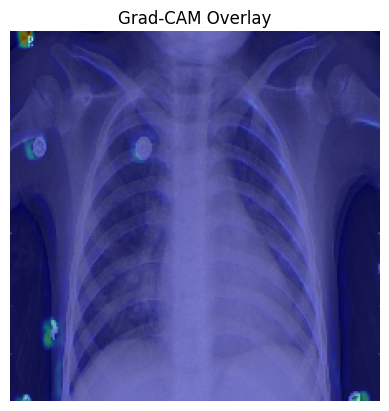

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

# Get filename
for fname in uploaded.keys():
    user_img_path = fname
    print(f"User uploaded: {user_img_path}")

# Load and preprocess the uploaded image
img_array = get_img_array(user_img_path)

# Get Grad-CAM heatmap and prediction
heatmap, pred_index = make_gradcam_heatmap(img_array, model, 'conv2')  # Use your conv layer name
predicted_class = class_labels[pred_index]

print(f"Predicted class: {predicted_class}")

# Show the Grad-CAM overlay
display_gradcam(user_img_path, heatmap)
